# Generating Music Using Python From Scratch
Have you ever wondered how to generate music by a computer? When I was a kid, I got a digital watch. One of the facinating features of this watch is the built-in music library which includes the classical one, *Für Elise*. It seems that I can still hear this digital sound many year latter.
Today we are going to build a music generator from the very basic using Python. 

## Preperations
- To play sounds, you need to install  `simpleaudio` by runing `pip install simpleaudio` at your terminal. 
- `Numpy` is used for data processing. If you don't have it installed, you can install it through `pip install numpy`

To start with, we import all the libraries we need.

In [125]:
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np
import time

In [202]:
import simpleaudio.functionchecks as fc

In [211]:
import numpy as np
import simpleaudio as sa

# calculate note frequencies
A_freq = 440
Csh_freq = A_freq * 2 ** (4 / 12)
E_freq = A_freq * 2 ** (7 / 12)

# get timesteps for each sample, T is note duration in seconds
sample_rate = 44100
T = 0.25
t = np.linspace(0, T, int(T * sample_rate), False)

# generate sine wave notes
A_note = np.sin(A_freq * t * 2 * np.pi)
Csh_note = np.sin(Csh_freq * t * 2 * np.pi)
E_note = np.sin(E_freq * t * 2 * np.pi)

# concatenate notes
audio = np.hstack((A_note, Csh_note, E_note))
# normalize to 16-bit range
audio *= 32767 / np.max(np.abs(audio))
# convert to 16-bit data
audio = audio.astype(np.int16)

# start playback
play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

# wait for playback to finish before exiting
play_obj.wait_done()

In [215]:
import numpy as np
import simpleaudio as sa

# calculate note frequencies
A_freq = 440
Csh_freq = A_freq * 2 ** (4 / 12)
E_freq = A_freq * 2 ** (7 / 12)

# get timesteps for each sample, T is note duration in seconds
sample_rate = 44100
T = 0.5
t = np.linspace(0, T, int(T * sample_rate), False)

# generate sine wave notes
A_note = np.sin(A_freq * t * 2 * np.pi)
Csh_note = np.sin(Csh_freq * t * 2 * np.pi)
E_note = np.sin(E_freq * t * 2 * np.pi)

# mix audio together
audio = np.zeros((44100, 2))
n = len(t)
offset = 0
audio[0 + offset: n + offset, 0] += A_note
audio[0 + offset: n + offset, 1] += 0.125 * A_note
offset = 5500
audio[0 + offset: n + offset, 0] += 0.5 * Csh_note
audio[0 + offset: n + offset, 1] += 0.5 * Csh_note
offset = 11000
audio[0 + offset: n + offset, 0] += 0.125 * E_note
audio[0 + offset: n + offset, 1] += E_note

# normalize to 16-bit range
audio *= 32767 / np.max(np.abs(audio))
# convert to 16-bit data
audio = audio.astype(np.int16)

# start playback
play_obj = sa.play_buffer(audio, 2, 2, sample_rate)

# wait for playback to finish before exiting
play_obj.wait_done()

In [218]:
import numpy as np
import simpleaudio as sa

# calculate note frequencies
A_freq = 440
Csh_freq = A_freq * 2 ** (4 / 12)
E_freq = A_freq * 2 ** (7 / 12)

# get timesteps for each sample, T is note duration in seconds
sample_rate = 44100
T = 0.5
t = np.linspace(0, T, int(T * sample_rate), False)

# generate sine wave tonef
tone = np.sin(440 * t * 2 * np.pi)

# normalize to 24-bit range
tone *= 8388607 / np.max(np.abs(tone))

# convert to 32-bit data
tone = tone.astype(np.int32)

# convert from 32-bit to 24-bit by building a new byte buffer, skipping every fourth bit
# note: this also works for 2-channel audio
i = 0
byte_array = []
for b in tone.tobytes():
    if i % 4 != 3:
        byte_array.append(b)
    i += 1
audio = bytearray(byte_array)

# start playback
play_obj = sa.play_buffer(audio, 1, 3, sample_rate)

# wait for playback to finish before exiting
play_obj.wait_done()

## Store A Sine Wave
Tone is a kind of vibration with a fixed frequency. Different frequencies correspond different tones. Let's look at this sine wave $y = \sin (2\pi f t)$, where $f=440$ is frenquency in hertz (Hz). 

In [142]:
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 440
amplitudes = np.sin(2 * np.pi * freq * ts)

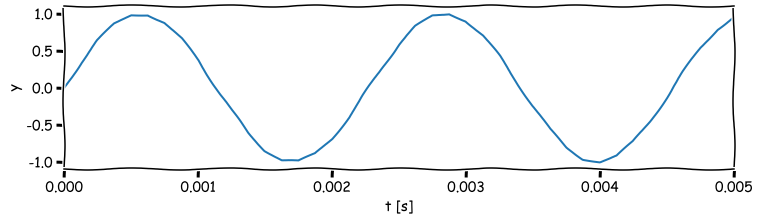

In [128]:
plt.xkcd()
plt.figure(figsize=(12,3))
plt.xlabel('t [s]')
plt.ylabel('y')
plt.xlim(0, 0.005)
plt.plot(ts, amplitudes)
plt.show()

This figure show how this wave looks like in the range of $t \in [0, 0.05]$. Here $y$ is a continous function. It's impossible to save all $y$ for every point of time $t$. Therefore, we can convert this sine wave into a sequence of "samples" like the following. 

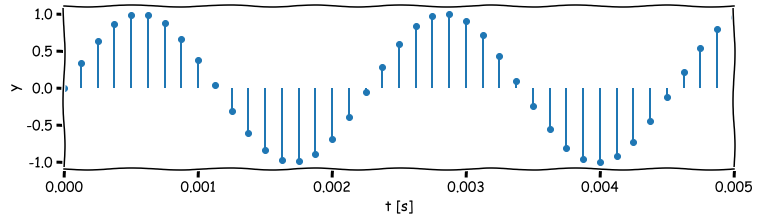

In [132]:
from matplotlib import collections as matcoll
lines = []
for i in range(ts.size):
    pair=[(ts[i],0), (ts[i], amplitudes[i])]
    lines.append(pair)
linecoll = matcoll.LineCollection(lines)

plt.xkcd()
fig, ax = plt.subplots(figsize=(12,3))
ax.add_collection(linecoll)

plt.xlabel('t [s]')
plt.ylabel('y')
plt.xlim(0, 0.005)
plt.scatter(ts, amplitudes)
plt.show()

This figure is the result of sampling 8000 points evenly during a second (s). Usually we call this number **sampling rate**. You may ask, "Is this how computer store this sine wave for sound?" Well, not exactly. You may have noticed that the values of $y$ are in the range from -1 to 1, which indicating most of $y$ values are floating number. However, it is much more easy to store these values as integers. 

In the computer world, we only have 0 and 1. The minimum storage unit in computer is called bit.  If I have one bit for storing, I can only store either 0 or 1. If I have two bits, I have four choices, $00_2$, $01_2$, $10_2$ and $11_2$, which correspond to 0, 1, 2, 3 in decimal system. (Here I use $xx_2$ to indecate $xx$ is a binary number.)  What about 3 bits, or 8 bits? You can try on yourself. It turns out there are $2^n$ choices for a $n$ bits storage. To make our life easier, we usually call 8 bits a byte, i.e., **1 byte equals to 8 bits**. Therefore you have $2^8 = 256$ choices in this byte storage range from 0 to 255. What if I use one bit to indecate the sign of this stored number? I mean, for example,  we can set it to 0 for a positive number and 1 for a negative number.  What is range of number a byte can represent? This is how I consider this question. As one bit has been occupied, so I have 7 bits to use. The largest number I can represent in 7 bits storage is $1111111_2$ which is 127 in decimal. If the sign bit is 1, this number is -127.  Thus,  a byte can represent integer numbers ranges from -127 to 127. 

Let's say the given storage for each $y$ value is a byte.  How can you represent the above sine wave? I'd like to say map the range $[-1, 1]$ to $[-127, 127]$ is a pretty strightfoward idea. 

In [137]:
audio = amplitudes * (2**7 - 1)
audio = audio.astype(np.int8)

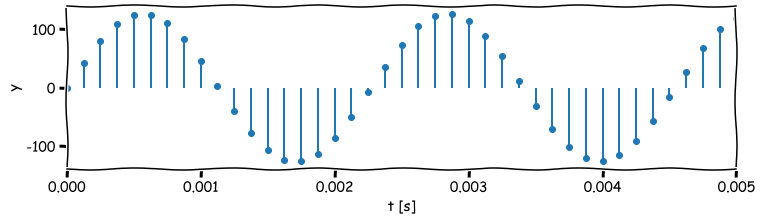

In [138]:
from matplotlib import collections as matcoll
lines = []
for i in range(ts.size):
    pair=[(ts[i],0), (ts[i], audio[i])]
    lines.append(pair)
linecoll = matcoll.LineCollection(lines)

plt.xkcd()
fig, ax = plt.subplots(figsize=(12,3))
ax.add_collection(linecoll)

plt.xlabel('t [s]')
plt.ylabel('y')
plt.xlim(0, 0.005)
plt.scatter(ts, audio)
plt.show()

Compare this figure to the last one, you can see the shape of wave doesn't change much, while the $y$ range changes to $[-127, 127]$. Actually, another change which is hard to tell is the $y$ values changes to integers as we have used a method to force floating numbers to integers.  We should notice that this kind of conversion definitely brings some errors.  By the way,  the number of bits we choose to store $y$ values is called **bit depth** in digital audio, which directly corresponds to the resolution of each sample. .

## Listen to the sine wave
Let hear what this sine wave sounds like.

In [236]:
def savewave(audio, name, channels, samplewidth, framerate):
    '''Save data to a wave file'''
    import wave
    with wave.open(name, "w") as f:
        f.setnchannels(channels)
        f.setsampwidth(samplewidth)
        f.setframerate(framerate)
        f.writeframes(audio.tobytes())

In [239]:
# bit depth: 8; sampling rate 8000
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 450
amplitudes = np.sin(2 * np.pi * freq * ts)
audio = amplitudes * (2**7 - 1)
audio = audio.astype(np.int8)
play_object = sa.play_buffer(audio, 1, 1, fs)
savewave(audio, "8bit-450hz.wav", 1, 1, 8000)

<p align="center">
<audio ref='themeSong' src="8bit-450hz.wav" controls  preload></audio>
</p>

In [240]:
# bit depth: 16; sampling rate 8000
fs = 8000
ts = np.linspace(0, 1, fs, False)
freq = 450
amplitudes = np.sin(2 * np.pi * freq * ts)
audio = amplitudes * (2**15 - 1)
audio = audio.astype(np.int16)
play_object = sa.play_buffer(audio, 1, 2, fs)
savewave(audio, "16bit-450hz.wav", 1, 2, 8000)

<p align="center">
<audio ref='themeSong' src="16bit-450hz.wav" controls  preload></audio>
</p>

In [243]:
# for i in range(10):
#     play_object = sa.play_buffer(audio, 1, 2, fs)
#     time.sleep(5)

You can hear the two sound clips are very different bacause of the bit depth. The second clip with 16 bits depth sound much more soft than the 8 bits depth clip. Now we know how to generate sound, let make some music.

## Create the basic notes
We create the basic botes in the 4-th octave based on [Equal temperamen](https://en.wikipedia.org/wiki/Equal_temperament)

In [246]:
ns = np.arange(-9, 3)
frequencies = 440 * 2**(ns/12)
note_names = ["C" ,"C#","D" ,"D#","E" ,"F" ,"F#","G" ,"G#", "A", "A#", "B"]
Notes = {note_names[i]:frequencies[i] for i in range(ns.size)}

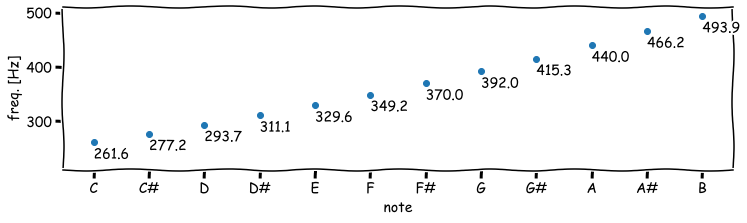

In [279]:
plt.xkcd()
fig, ax = plt.subplots(figsize=(12,3))
plt.xlabel('note')
plt.ylabel('freq. [Hz]')
plt.ylim(210, 510)
plt.scatter(note_names, frequencies)
for i in range(12):
    ax.annotate('{:.1f}'.format(frequencies[i]), (note_names[i], frequencies[i] - 30))
plt.show()

## Play Notes

In [340]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [341]:
has_numbers('E4')

True

In [588]:
def play(note, fs=8000, duration=0.5):
    global Notes
    t = np.linspace(0, duration, int(duration * fs), False)
    if note != 'O':
        if has_numbers(note):
            octave = int(note[-1])
            frequency = Notes[note[:-1]]
            frequency = frequency * 2**(octave - 4)
        else:
            frequency = Notes[note]   # 4-th octave by defaut
        audio = np.sin(2 * np.pi * frequency * t)
        audio = audio * (2**15 - 1)  / np.max(np.abs(audio))
    else:
        audio = np.zeros(int(duration * fs)) # rest
    audio = audio.astype(np.int16)
    play_object = sa.play_buffer(audio, 1, 2, fs)

In [589]:
play('O')

In [590]:
play('C')
play('E4')
play('G4')

## To elise
You can find the sheet at [Here](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2022_04_13_20_g6YGx7.jpg)
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2022_04_13_20_g6YGx7.jpg)

In [610]:
# to_elise = ['E5-8', 'D#5-8', '|', \
#                     'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|',\
#                     'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', \
#                     'B-4', 'O-8', 'E-8', 'G#-8', 'B-8', '|', \
#                     'C5-4', 'O-4', 'E5-8', 'D#5-8', '|', \
#                     'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|',\
#                     'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', \
#                     'B-4', 'O-8', 'E-8', 'C5-8', 'B-8', '|', 'A4-4', 'O-4', 'E5-8', 'D#5-8', '|']

In [611]:
# def playSheet(sheet, tempo=120):
#     for sign in sheet:
#         if sign == '|':
#             continue
#         if '-' in sign:
#             note, note_type= sign.split('-')
#             note_type = int(note_type)
#         else:
#             note = sign
#             note_type = 4 # 4-th note as default
#         play(note)
#         time.sleep( (60/tempo)*(4/note_type))

In [612]:
# playSheet(to_elise)

In [613]:
to_elise = \
['E5-8', 'D#5-8', '|:', 'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|', 'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|',  'B-4', 'O-8', 'E-8', 'G#-8', 'B-8', '|', 'C5-4', 'O-4', 'E5-8', 'D#5-8', '|',  'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|',\
 'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', 'B-4', 'O-8', 'E-8', 'C5-8', 'B-8', '|', 'A-4', 'O-4', 'E5-8', 'D#5-8', ':|', 'A-4', 'O-8', 'B-8', 'C5-8', 'D5-8', '|:', 'E5-4', 'O-8', 'G-8', 'F5-8', 'E5-8', '|',\
 'D5-4', 'O-8', 'F-8', 'E5-8', 'D5-8', '|', 'C5-4', 'O-8','E-8', 'D5-8', 'C5-8',  '|', 'B-4', 'E5-8', 'E3-8', 'E-8', 'E-8', '|', 'E5-8', 'E-8', 'E5-8', 'D#-8', 'E-8', 'D-8', '|', 'E-8', 'D#-8', 'E-8', 'D#5-8',  'E-8', 'D-8', '|', \
 'E5-8', 'D#5-8', 'E5-8', 'B-8', 'D5-8', 'C5-8', '|', 'A-4', 'O-8', 'C-8', 'E-8', 'A-8', '|', 'B-4', 'O-8','E-8','G#-8','B-8','|','C5-4','O-4','E5-8','D#5-8', '|', 'E5-8','D#5-8','E5-8','B-8','D5-8','C5-8','|',\
 'A-4','O-8','C-8','E-8','A-8','|','B-4','O-8', 'E-4', 'C5-8','B-8','|','A-4','O-8','B-8','C5-8','D5-8', ':|', 'A-4', 'O-2']

In [614]:
def last_bar_index(sheet):
    max_index = len(sheet)-1
    for i,sign in enumerate(reversed(sheet)):
        if sign=='|':
            return max_index - i     

#  Test
li = ['E5-8', 'D#5-8', '|',  'E5-8', 'D#5-8', '|', 'E5-8']
idx = last_bar_index(li)
li[:idx]

['E5-8', 'D#5-8', '|', 'E5-8', 'D#5-8']

In [615]:
record_clip=[]
record_status = False
def playSheet(sheet, tempo=120):
    global record_clip, record_status
    for sign in sheet:
        # print(sign, record_status)
        if record_status == True:
            record_clip.append(sign)
        if sign == '|:':
            record_status = True
            continue
        if sign == ':|' and record_status == True:
            record_status = False
            record_clip = record_clip[:last_bar_index(record_clip)]
            playSheet(record_clip, tempo=tempo)
            record_clip = []
            continue
        if sign == '|':
            continue
        if '-' in sign:
            note, note_type= sign.split('-')
            note_type = int(note_type)
        else:
            note = sign
            note_type = 4 # 4-th note as default
        play(note)
        time.sleep( (60/tempo)*(4/note_type))

In [617]:
playSheet(to_elise)